# WT1 specificity of clusters

In [1]:
# Imports
import datetime
import os
import pandas as pd


import plotnine as pn
# Adjust the working directory
os.chdir('path_to_your_dir')




In [2]:
def split_rows(df, column, symbol):
    
    s = df[column].str.split(symbol, expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df.loc[i].copy()
    df2[column] = s.values
    return df2

In [3]:
# Read data
data = pd.read_csv('./results/wt1_visualization/PRJNA510967/All_tcrs.tsv', sep='\t')

# Group volunteers per CDR3
data_volunteer = (data.groupby(['CDR3_beta'])['Volunteer'].apply(', '.join)
              .reset_index().set_index(['CDR3_beta']))
data_response = (data.groupby(['CDR3_beta'])['Response'].apply(', '.join)
               .reset_index().set_index(['CDR3_beta']))
grouped_data = pd.concat([data_volunteer, data_response], axis=1)

grouped_data

,Volunteer,Response
CDR3_beta,,
CAADRAATNEKLFF,PT2_CR2,Complete_remission
CAAGDRAYEQYF,PT1_CR1,Complete_remission
CAAGDRELEQYF,PT1_CR1,Complete_remission
CAAKGDSSYNEQFF,PT2_CR2,Complete_remission
CAAKQGRENSPLHF,PT1_CR1,Complete_remission
...,...,...
CTSSPFPLCSYNEQFF,HD3,Healthy
CTSSQDAHEQFF,PT6_REL3,Relapse
CTTAESNQPQHF,PT1_CR1,Complete_remission


In [4]:
# Add WT1 specificity
wt1_37 = pd.read_csv('./results/wt1_visualization/PRJNA510967/WT1_37_specific_clusters', sep='\t')
wt1_126 = pd.read_csv('./results/wt1_visualization/PRJNA510967/WT1_126_specific_clusters', sep='\t')

def get_response(wt1, data):
    
    wt1 = wt1.rename(columns={'CDR3': 'CDR3_beta'})
    wt1 = wt1.set_index('CDR3_beta')
    result = wt1.join(data)
    print(result.shape[0])
    return result

result = get_response(wt1_37, grouped_data)
result = split_rows(result,'Volunteer',',')
result['Volunteer'] = result['Volunteer'].str.replace(' ','')
result2 = get_response(wt1_126, grouped_data)
results = pd.concat([result,result2])


results = results.replace({'cluster': {8: 'A', 70: 'B', 75:'C', 113:'D', 191:'E', 239:'F', 251:'G'}})
results.sort_values(by='cluster').to_csv('./results/wt1_visualization/PRJNA510967/specific_clusters_with_response.tsv',sep='\t')

38
4


In [5]:
# Count TCRs per cluster and volunteer
results = results[['cluster', 'Volunteer','Response']]
results = results.groupby(by=['Volunteer','cluster','Response']).size().reset_index()
results = results.rename(columns = {0:'count'})

In [6]:
# Parsing
results.loc[results.Volunteer == 'PT1_CR1', 'Response'] = 'Complete_remission'
results.loc[results.Volunteer == 'PT5_REL2', 'Response'] = 'Relapse'
results.loc[results.Volunteer == 'PT6_REL3', 'Response'] = 'Relapse'
results['Response'] = results['Response'].replace('Complete_remission','Complete remission ')


In [7]:
fig = (pn.ggplot(results, pn.aes('Volunteer', 'cluster', size = 'count', color='Response')) +
 pn.geom_point() +
 pn.theme_minimal() +
 pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1))+
 pn.labels.ylab(ylab = 'WT1 T cell receptor cluster')+
 #https://davidmathlogic.com/colorblind/#%23648FFF-%23DC267F-%23FFB000
 pn.scale_color_manual(['#648FFF','#DC267F','#FFB000'])+
 pn.scale_size_continuous(guide=False)
)

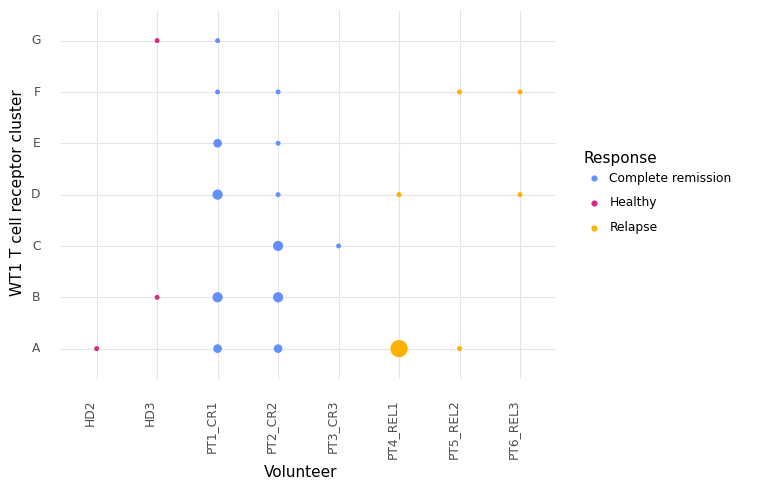

<ggplot: (277751095)>

In [8]:
fig

In [9]:
fig.save('./results/wt1_visualization/PRJNA510967/clusters.pdf', dpi=300)

/Users/sofiegielis/miniconda3/envs/new_cluster/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/sofiegielis/miniconda3/envs/new_cluster/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./results/wt1_visualization/PRJNA510967/clusters.pdf
